In [59]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [60]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [61]:
NUM_CLASSES = 8

# Dataset reading

In [62]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [63]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [65]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [66]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_6 (Dropout)         (None, 42)                0         
                                                                 
 dense_9 (Dense)             (None, 20)                860       
                                                                 
 dropout_7 (Dropout)         (None, 20)                0         
                                                                 
 dense_10 (Dense)            (None, 10)                210       
                                                                 
 dense_11 (Dense)            (None, 8)                 88        
                                                                 
Total params: 1,158
Trainable params: 1,158
Non-trainable params: 0
_________________________________________________________________


In [67]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [68]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [69]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
22/32 [===================>..........] - ETA: 0s - loss: 1.9946 - accuracy: 0.1737
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
32/32 [==============================] - 2s 18ms/step - loss: 1.9634 - accuracy: 0.1856 - val_loss: 1.8486 - val_accuracy: 0.2570
Epoch 2/1000
22/32 [===================>..........] - ETA: 0s - loss: 1.8112 - accuracy: 0.2422
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
32/32 [==============================] - 0s 10ms/step - loss: 1.7944 - accuracy: 0.2527 - val_loss: 1.7027 - val_accuracy: 0.2768
Epoch 3/1000
27/32 [========================>.....] - ETA: 0s - loss: 1.7043 - accuracy: 0.3035
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
32/32 [==============================] - 0s 9ms/step - loss: 1.6930 - accuracy: 0.3097 - val_loss: 1.5897 - val_accuracy: 0.4288
Epoch 4/1000
23/32 [====================>.........] - ETA: 0s - loss: 1.6226 - accuracy: 0.3665

32/32 [==============================] - ETA: 0s - loss: 0.9497 - accuracy: 0.6295
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
32/32 [==============================] - 0s 8ms/step - loss: 0.9497 - accuracy: 0.6295 - val_loss: 0.6566 - val_accuracy: 0.8458
Epoch 29/1000
26/32 [=======================>......] - ETA: 0s - loss: 0.9417 - accuracy: 0.6241
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
32/32 [==============================] - 0s 9ms/step - loss: 0.9420 - accuracy: 0.6237 - val_loss: 0.6423 - val_accuracy: 0.8392
Epoch 30/1000
28/32 [=========================>....] - ETA: 0s - loss: 0.9509 - accuracy: 0.6183
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
32/32 [==============================] - 0s 8ms/step - loss: 0.9440 - accuracy: 0.6210 - val_loss: 0.6387 - val_accuracy: 0.8429
Epoch 31/1000
29/32 [==========================>...] - ETA: 0s - loss: 0.9220 - accuracy: 0.6401
Epoch 31

31/32 [============================>.] - ETA: 0s - loss: 0.8058 - accuracy: 0.6915
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
32/32 [==============================] - 0s 8ms/step - loss: 0.8096 - accuracy: 0.6883 - val_loss: 0.4810 - val_accuracy: 0.8943
Epoch 56/1000
29/32 [==========================>...] - ETA: 0s - loss: 0.8106 - accuracy: 0.6972
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
32/32 [==============================] - 0s 9ms/step - loss: 0.8080 - accuracy: 0.6976 - val_loss: 0.4915 - val_accuracy: 0.8891
Epoch 57/1000
31/32 [============================>.] - ETA: 0s - loss: 0.8290 - accuracy: 0.6850
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
32/32 [==============================] - 0s 9ms/step - loss: 0.8270 - accuracy: 0.6863 - val_loss: 0.4816 - val_accuracy: 0.8950
Epoch 58/1000
26/32 [=======================>......] - ETA: 0s - loss: 0.8240 - accuracy: 0.6854
Epoch 58

31/32 [============================>.] - ETA: 0s - loss: 0.7313 - accuracy: 0.7215
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
32/32 [==============================] - 0s 11ms/step - loss: 0.7296 - accuracy: 0.7221 - val_loss: 0.4190 - val_accuracy: 0.9229
Epoch 83/1000
27/32 [========================>.....] - ETA: 0s - loss: 0.7636 - accuracy: 0.7205
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
32/32 [==============================] - 0s 9ms/step - loss: 0.7537 - accuracy: 0.7218 - val_loss: 0.4193 - val_accuracy: 0.9207
Epoch 84/1000
29/32 [==========================>...] - ETA: 0s - loss: 0.7535 - accuracy: 0.7169
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
32/32 [==============================] - 0s 8ms/step - loss: 0.7513 - accuracy: 0.7179 - val_loss: 0.4107 - val_accuracy: 0.9214
Epoch 85/1000
24/32 [=====================>........] - ETA: 0s - loss: 0.7254 - accuracy: 0.7360
Epoch 8

32/32 [==============================] - ETA: 0s - loss: 0.7041 - accuracy: 0.7419
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
32/32 [==============================] - 0s 8ms/step - loss: 0.7041 - accuracy: 0.7419 - val_loss: 0.3800 - val_accuracy: 0.9229
Epoch 110/1000
30/32 [===========================>..] - ETA: 0s - loss: 0.7367 - accuracy: 0.7260
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
32/32 [==============================] - 0s 8ms/step - loss: 0.7297 - accuracy: 0.7294 - val_loss: 0.3777 - val_accuracy: 0.9229
Epoch 111/1000
29/32 [==========================>...] - ETA: 0s - loss: 0.7175 - accuracy: 0.7408
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
32/32 [==============================] - 0s 8ms/step - loss: 0.7090 - accuracy: 0.7419 - val_loss: 0.3793 - val_accuracy: 0.9244
Epoch 112/1000
30/32 [===========================>..] - ETA: 0s - loss: 0.6983 - accuracy: 0.7477
Ep

Epoch 136/1000
28/32 [=========================>....] - ETA: 0s - loss: 0.6845 - accuracy: 0.7478
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
32/32 [==============================] - 0s 8ms/step - loss: 0.6755 - accuracy: 0.7502 - val_loss: 0.3519 - val_accuracy: 0.9258
Epoch 137/1000
30/32 [===========================>..] - ETA: 0s - loss: 0.6770 - accuracy: 0.7458
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
32/32 [==============================] - 0s 9ms/step - loss: 0.6778 - accuracy: 0.7461 - val_loss: 0.3517 - val_accuracy: 0.9222
Epoch 138/1000
25/32 [======================>.......] - ETA: 0s - loss: 0.6878 - accuracy: 0.7384
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
32/32 [==============================] - 0s 8ms/step - loss: 0.6811 - accuracy: 0.7400 - val_loss: 0.3589 - val_accuracy: 0.9185
Epoch 139/1000
30/32 [===========================>..] - ETA: 0s - loss: 0.6901 - accu

Epoch 163/1000
32/32 [==============================] - ETA: 0s - loss: 0.6642 - accuracy: 0.7610
Epoch 163: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
32/32 [==============================] - 0s 8ms/step - loss: 0.6642 - accuracy: 0.7610 - val_loss: 0.3323 - val_accuracy: 0.9170
Epoch 164/1000
29/32 [==========================>...] - ETA: 0s - loss: 0.6645 - accuracy: 0.7551
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
32/32 [==============================] - 0s 8ms/step - loss: 0.6551 - accuracy: 0.7583 - val_loss: 0.3357 - val_accuracy: 0.9178
Epoch 165/1000
18/32 [===============>..............] - ETA: 0s - loss: 0.6821 - accuracy: 0.7517
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
32/32 [==============================] - 0s 8ms/step - loss: 0.6689 - accuracy: 0.7551 - val_loss: 0.3235 - val_accuracy: 0.9251
Epoch 166/1000
28/32 [=========================>....] - ETA: 0s - loss: 0.6550 - accu

Epoch 190/1000
30/32 [===========================>..] - ETA: 0s - loss: 0.6432 - accuracy: 0.7607
Epoch 190: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
32/32 [==============================] - 0s 8ms/step - loss: 0.6427 - accuracy: 0.7608 - val_loss: 0.3091 - val_accuracy: 0.9229
Epoch 191/1000
17/32 [==============>...............] - ETA: 0s - loss: 0.6210 - accuracy: 0.7753
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
32/32 [==============================] - 0s 7ms/step - loss: 0.6267 - accuracy: 0.7735 - val_loss: 0.3273 - val_accuracy: 0.9046
Epoch 192/1000
27/32 [========================>.....] - ETA: 0s - loss: 0.6266 - accuracy: 0.7752
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
32/32 [==============================] - 0s 8ms/step - loss: 0.6225 - accuracy: 0.7760 - val_loss: 0.2981 - val_accuracy: 0.9332
Epoch 193/1000
28/32 [=========================>....] - ETA: 0s - loss: 0.6371 - accu

Epoch 216: early stopping


In [70]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

11/11 [==============================] - 0s 5ms/step - loss: 0.3047 - accuracy: 0.9185


In [71]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [72]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 94ms/step
[9.7396833e-01 2.5993796e-02 2.8475712e-05 5.5052294e-07 8.8002816e-06
 8.5565848e-13 2.5183640e-14 6.0158598e-08]
0


# Confusion matrix

43/43 [==============================] - 0s 3ms/step


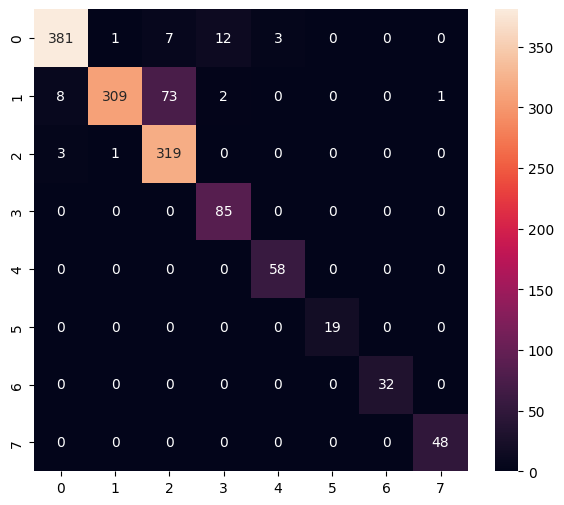

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       404
           1       0.99      0.79      0.88       393
           2       0.80      0.99      0.88       323
           3       0.86      1.00      0.92        85
           4       0.95      1.00      0.97        58
           5       1.00      1.00      1.00        19
           6       1.00      1.00      1.00        32
           7       0.98      1.00      0.99        48

    accuracy                           0.92      1362
   macro avg       0.94      0.96      0.95      1362
weighted avg       0.93      0.92      0.92      1362



In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [74]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [75]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\rashi\AppData\Local\Temp\tmpzzqsrfeh\assets


INFO:tensorflow:Assets written to: C:\Users\rashi\AppData\Local\Temp\tmpzzqsrfeh\assets


6772

# Inference test

In [76]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [77]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [78]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [79]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [80]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.7396833e-01 2.5993770e-02 2.8475712e-05 5.5052288e-07 8.8002980e-06
 8.5566011e-13 2.5183736e-14 6.0158712e-08]
0
